# PHASE 2 MILESTONE 1

# 1. Introduction

* Name : Ajeng Nilta Adriani
* Batch : FTDS - 002

## 1.1 About The Dataset 

Download the dataset [here](https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs). This is image data of Natural Scenes around the world.

This Data contains around 885 images of size 150x150 distributed 8 categories.

```py
{'algal leaf' -> 0,
'Anthracnose' -> 1,
'bird eye spot' -> 2,
'brown blight' -> 3,
'gray light' -> 4,
'healthy' -> 5,
'red leaf spot' -> 6,
'white spot' -> 7 }
```

This tea sickness dataset contains tea leaves showing 7 common diseases of tea: (1) Red leaf spot; (2) Algal leaf
spot; (3) Bird’s eyespot; (4) Gray blight; (5) White spot; (6) Anthracnose; (7) Brown blight. The dataset further contains a class of healthy tea leaves.  Each of the classes contains more than 100 images. The dataset was collected in Johnstone Boiyon farm, Koiwa location, Bomet county from a clone of 1510. It can be used with transfer learning for Machine learning models for predicting sickness in tea.

## 1.2 The Objective 

Objective : "Identifying Disease in Tea leaves Using convolutional neural network."

# 2. Import Libraries

The first cell in the notebook must contain and only contain all the libraries used in the project.

In [75]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
import random

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

np.random.seed(50)
tf.random.set_seed(50)

In [2]:
!pip install split-folders

# 3. Data Loading 

This section contains the process of preparing data for the model training process, such as dividing data into train-dev-test, data transformation (normalization, encoding, etc.), and other processes needed.

In [2]:
import splitfolders 

splitfolders.ratio('tea-sickness-dataset', output='Dataset Tea Sickness', seed=42, ratio=(0.8,0.1,0.1), group_prefix=None)

Copying files: 885 files [00:01, 538.52 files/s]


In [3]:
train_folder=r'Dataset Tea Sickness/train/'
val_folder=r'Dataset Tea Sickness/val/'
test_folder=r'Dataset Tea Sickness/test/'

In [4]:
import pathlib
data_train = pathlib.Path(train_folder)
train_count = len(list(data_train.glob('*/*.jpg')))

data_val = pathlib.Path(val_folder)
val_count = len(list(data_val.glob('*/*.jpg')))

data_test = pathlib.Path(test_folder)
test_count = len(list(data_test.glob('*/*.jpg')))

print('===train count===')
print(train_count)
print('===val count===')
print(val_count)
print('===test count===')
print(test_count)

===train count===
706
===val count===
87
===test count===
92


# 4. Exploraty Data Analysis (EDA)

This section contains data exploration in the dataset above by using queries, groupings, simple visualizations, and so on.

In [5]:
import os

algal_leaf_train= r'Dataset Tea Sickness/train/algal leaf/'
anthracnose_train= r'Dataset Tea Sickness/train/Anthracnose/'
bird_eye_train= r'Dataset Tea Sickness/train/bird eye spot/'
brown_blight_train= r'Dataset Tea Sickness/train/brown blight/'
gray_light_train= r'Dataset Tea Sickness/train/gray light/'
healthy_train= r'Dataset Tea Sickness/train/healthy/'
red_leaf_train= r'Dataset Tea Sickness/train/red leaf spot/'
white_train= r'Dataset Tea Sickness/train/white spot/'
dirlist=[algal_leaf_train, anthracnose_train, bird_eye_train, brown_blight_train, gray_light_train, healthy_train, red_leaf_train, white_train]
classes=['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']
filepaths=[]
labels=[]
for d,c in zip(dirlist, classes):
    flist=os.listdir(d)
    for f in flist:
        fpath=os.path.join (d,f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  706    labels:  706


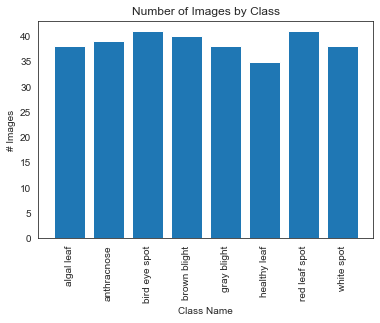

In [6]:
classes_len = { 'algal leaf' : len(algal_leaf_train),
            'anthracnose': len(anthracnose_train),
            'bird eye spot': len(bird_eye_train),
            'brown blight': len(brown_blight_train),
            'gray blight': len(gray_light_train), 
            'healthy leaf': len(healthy_train),  
            'red leaf spot': len(red_leaf_train), 
            'white spot': len(white_train)
          }
plt.bar(classes_len.keys(), classes_len.values());
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.xticks(rotation=90)
plt.ylabel('# Images');

This tea sickness dataset on train contains tea leaves showing 8 common diseases of tea: (1) Algal leaf; (2) Anthracnose; (3) Bird’s eyespot; (4) Brown blight; (5) Gray blight; (6) healthy leaf; (7) Red leaf spot; (8) White leaf spot. The dataset further contains a class of healthy tea leaves. Each of the classes of diseases of tea leaves contains at least 40 images and healty tea leaves contains 35 images.

red leaf spot    114
white spot       113
algal leaf        90
brown blight      90
Anthracnose       80
bird eye spot     80
gray light        80
healthy           59
Name: labels, dtype: int64


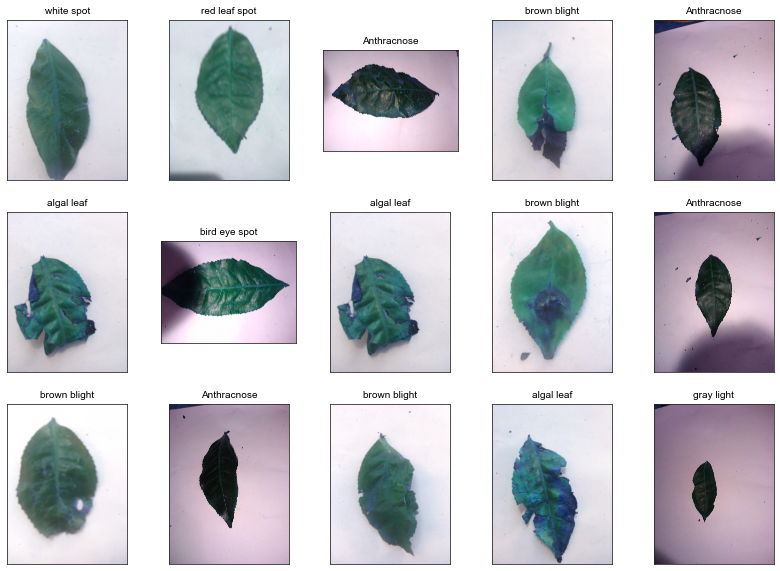

In [7]:
import pandas as pd
import cv2

Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries,Lseries], axis=1)
df=pd.DataFrame(np.array(df).reshape(706,2), columns = ['file_paths', 'labels'])
print(df['labels'].value_counts())

plt.figure(figsize=(14,10))
for i in range(15):
    file = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[file,"file_paths"]))
    plt.title(df.loc[file, "labels"], size = 10, color = "black") 
    plt.xticks([])
    plt.yticks([])

plt.show()

From the preview images from each classes, we can see that each leaves have different particular characteristics from their own color, their rip, or their spotness.

Some of group of Classes are easily to be distinguished as object since the backgrounds are quite contrast to the leaf while the others are probably not taken pictures in proper lighting, such as class: anthracnose, bird eye spot, and gray light.

# 4. Data Preprocessing

This section contains the process of preparing data for the model training process, such as dividing data into train-dev-test, data transformation (normalization, encoding, etc.), and other processes needed.

In [8]:
keras.backend.clear_session()
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [9]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 250
IMG_WIDTH = 250
BATCH_SIZE = 32

### 4.1 Dividing data into train-dav-test

In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_folder,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            label_mode='categorical')

Found 706 files belonging to 8 classes.


In [11]:
val_dataset = tf.keras.utils.image_dataset_from_directory(val_folder,
                                                          batch_size=BATCH_SIZE,
                                                          image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          label_mode='categorical')

Found 87 files belonging to 8 classes.


In [12]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_folder,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           label_mode='categorical')

Found 92 files belonging to 8 classes.


In [13]:
class_names = train_dataset.class_names
print(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [14]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 250, 250, 3)
(32, 8)


### 4.2 Augmenting Image Data

Here we will augment the images by using ImageDataGenerator.

In [37]:
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)


val_aug = ImageDataGenerator(rescale=1./255)
test_aug = ImageDataGenerator(rescale=1./255)

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(650).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# 5. Deep Learning Modeling

## 5.1 Model Definition

This section contains cells to define the model. Explain the reasons for using an algorithm/model, the hyperparameters used, the types of metrics used, and other things related to the model.

In this case, an objectives which is expected to be performed is computer vision with Convolutional Neural Network model that able to identify classification of disease in tea leaves from dataset. Hence, there are two types of convolutionl neural network which will be trained and evaluated as follows:

* CNN - Sequential API

### 5.1.1 Base Model CNN 

In [38]:
# Defining the layers

model_seq_1 = keras.models.Sequential([   
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH,3)), 
    keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(8, activation='sigmoid')
])

In [39]:
model_seq_1.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Compiling

In [40]:
model_seq_1.build(input_shape=(None, IMG_HEIGHT, IMG_WIDTH, 3))
model_seq_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 125, 125, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 64)      

### Model Training

In [41]:
history_1 = model_seq_1.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
23/23 [==============================] - 13s 510ms/step - loss: 100.3138 - accuracy: 0.1912 - val_loss: 1.8434 - val_accuracy: 0.2529
Epoch 2/20
23/23 [==============================] - 12s 501ms/step - loss: 1.7496 - accuracy: 0.2592 - val_loss: 1.7599 - val_accuracy: 0.2644
Epoch 3/20
23/23 [==============================] - 13s 580ms/step - loss: 1.5712 - accuracy: 0.2762 - val_loss: 1.6818 - val_accuracy: 0.2529
Epoch 4/20
23/23 [==============================] - 14s 591ms/step - loss: 1.4877 - accuracy: 0.2535 - val_loss: 1.6408 - val_accuracy: 0.2644
Epoch 5/20
23/23 [==============================] - 14s 587ms/step - loss: 1.4143 - accuracy: 0.2578 - val_loss: 1.6134 - val_accuracy: 0.2874
Epoch 6/20
23/23 [==============================] - 14s 593ms/step - loss: 1.3450 - accuracy: 0.2663 - val_loss: 1.5753 - val_accuracy: 0.2989
Epoch 7/20
23/23 [==============================] - 15s 635ms/step - loss: 1.3025 - accuracy: 0.2776 - val_loss: 1.5702 - val_accuracy: 0.32

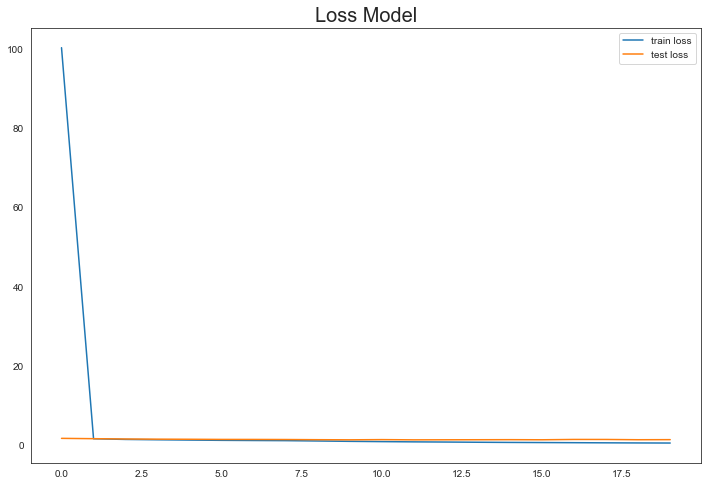

In [42]:
plt.figure(figsize=(12,8))
plt.title('Loss Model', fontsize=20)
plt.plot(history_1.history['loss'],label='train loss')
plt.plot(history_1.history['val_loss'],label='test loss')
plt.legend()

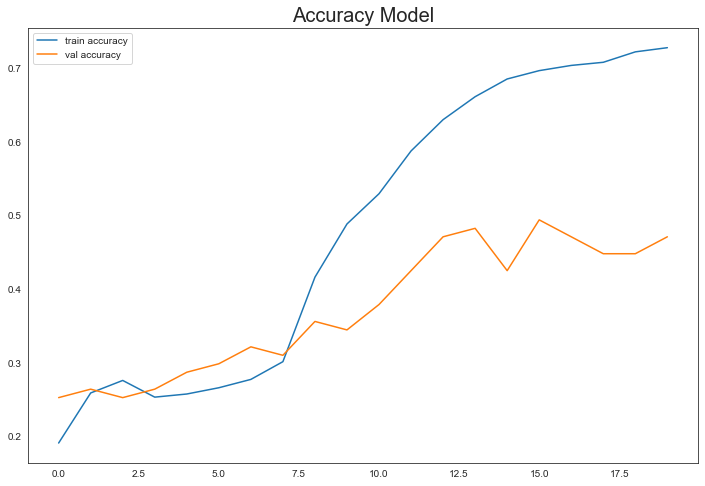

In [43]:
plt.figure(figsize=(12,8))
plt.title('Accuracy Model', fontsize=20)
plt.plot(history_1.history['accuracy'],label='train accuracy')
plt.plot(history_1.history['val_accuracy'],label='val accuracy')
plt.legend()

We can see that CNN sequential API model indicates both loss and accuracy are divergent. Learning curve in train set its loss function significantly decreases into 0,66 meanwhile in valid set its loss function moves divergent to 1,51. The train set's accuracy indicates 0,72 which means too good to be true while the valid set's accuracy stucks in 0,47. It is a clear sign in which this model tends to overfitting.

In [24]:
print("\nEvaluate on test data")
result = model_seq_1.evaluate(test_ds)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
3/3 [==============================] - 1s 142ms/step - loss: 0.7323 - accuracy: 0.7391
Test - Loss     :  0.7323349118232727
Test - Accuracy :  0.739130437374115



### 5.1.2 Model Improvement

Pada bagian ini, dilakukan upaya improvisasi model yang harus menunjukkan bagaimana performa model membaik berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### Model Improvement CNN Sequential

In [44]:
model_seq_2 = Sequential([
  normalization_layer,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(2, activation='softmax')
])

In [47]:
#Callback checkpoint untuk save model setiap menemukan metrik yang terbaik, disini diset validation loss
checkpoint = ModelCheckpoint('Tea_Sickness_Model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

#Callback untuk menghentikan training jika val_lossnya paling rendah dengan menunggu 3 epoch selanjutnya baru berhenti jika tidak ada improvisasi
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

#Mengurangi nilai learning rate ketika model tidak mengalami improvisasi selama 3 epoch berturut-turut
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [53]:
# compiling the improved model
model_seq_2.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [54]:
# summarizing the improved model
model_seq_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 248, 248, 16)      448       
                                                                 
 conv2d_16 (Conv2D)          (None, 246, 246, 32)      4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 123, 123, 32)     128       
 ormalization)                                                   
                                                                 
 flatten_5 (Flatten)         (None, 484128)            0         
                                                                 
 dense_11 (Dense)            (None, 25)               

### Model Training

In [55]:
history_2 = model_seq_2.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
23/23 [==============================] - 35s 2s/step - loss: 1.8686 - accuracy: 0.3357 - val_loss: 11.1414 - val_accuracy: 0.2299
Epoch 2/20
23/23 [==============================] - 34s 1s/step - loss: 1.3201 - accuracy: 0.5212 - val_loss: 33.6894 - val_accuracy: 0.1264
Epoch 3/20
23/23 [==============================] - 36s 2s/step - loss: 1.0587 - accuracy: 0.6119 - val_loss: 5.4050 - val_accuracy: 0.2184
Epoch 4/20
23/23 [==============================] - 35s 2s/step - loss: 0.8813 - accuracy: 0.6870 - val_loss: 3.2789 - val_accuracy: 0.3678
Epoch 5/20
23/23 [==============================] - 35s 2s/step - loss: 0.7080 - accuracy: 0.7691 - val_loss: 2.2449 - val_accuracy: 0.4368
Epoch 6/20
23/23 [==============================] - 34s 1s/step - loss: 0.6083 - accuracy: 0.8229 - val_loss: 2.1936 - val_accuracy: 0.3793
Epoch 7/20
23/23 [==============================] - 38s 2s/step - loss: 0.5349 - accuracy: 0.8584 - val_loss: 2.9058 - val_accuracy: 0.3218
Epoch 8/20
23/23 [

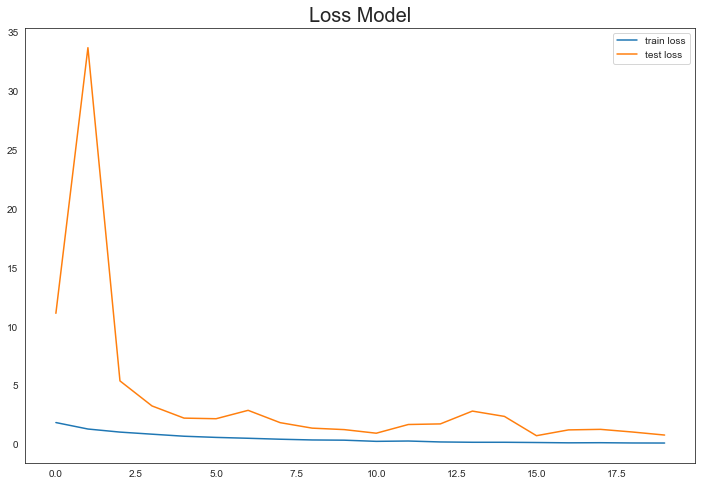

In [57]:
plt.figure(figsize=(12,8))
plt.title('Loss Model', fontsize=20)
plt.plot(history_2.history['loss'],label='train loss')
plt.plot(history_2.history['val_loss'],label='test loss')
plt.legend()

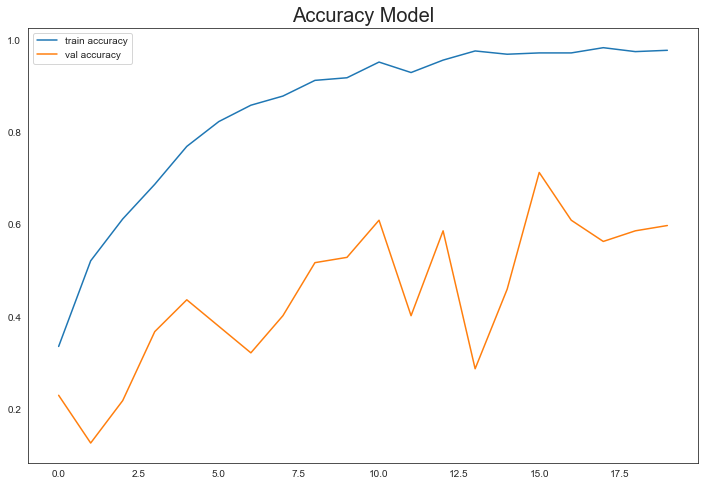

In [58]:
plt.figure(figsize=(12,8))
plt.title('Accuracy Model', fontsize=20)
plt.plot(history_2.history['accuracy'],label='train accuracy')
plt.plot(history_2.history['val_accuracy'],label='val accuracy')
plt.legend()

We can see that 1st CNN sequential API model Improvement indicates both loss and accuracy are divergent. Learning curve in train set its loss function significantly decreases into 0,13 meanwhile in valid set its loss function moves divergent to 0,80. The train set's accuracy indicates 0,97 which means too good to be true while the valid set's accuracy stucks in 0,59. It is a clear sign in which this model tends to overfitting.

In [59]:
pred = model_seq_1.predict(test_ds)
pred = np.argmax(pred, axis=1)
true = tf.concat([y for x, y in test_ds], axis = 0).numpy()
true = np.argmax(true,axis=1)
target_names = class_names

3/3 [==============================] - 0s 126ms/step


### Model Improvement Transfer Learning - VGG16

Model improvement that will be taken to this case is by using pretrained model. As we know that pretrained model has been established with large scale of images resource in 'Imagenet' and developed them as transfer learning. Put it simply, transfer learning allows us to use a pre-existing model, trained on a huge dataset, for our own tasks. Consequently reducing the cost of training new deep learning models and since the datasets have been vetted, we can be assured of the quality.

In [82]:
# Defining VGG16
base_model = VGG16(input_shape=(IMG_HEIGHT,IMG_WIDTH,3), 
                   include_top=False,
                   weights="imagenet")

In [83]:
# Freezing Layers 
for layer in base_model.layers:
    layer.trainable=False

In [84]:
# Summary
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [90]:
# Defining Layers
model3=Sequential()
model3.add(base_model)
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(BatchNormalization())
model3.add(Dense(32,kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(8,activation='softmax'))

In [91]:
# Defining Callbacks
filepath = './best_weights.h5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 3,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

reduce_lrt = ReduceLROnPlateau(monitor='val_accuracy',
                              mode='max',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callback_list = [earlystopping, checkpoint, reduce_lrt]

### Model Compiling

In [92]:
# Model Compile 
OPT    = RMSprop()

model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=OPT)

In [93]:
# Summary
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 512)         0         
                                                                 
 flatten_11 (Flatten)        (None, 25088)             0         
                                                                 
 batch_normalization_8 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 32)                802848    
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                     

In [95]:
history_3 = model3.fit(train_ds,validation_data=val_ds,epochs=20, callbacks = callback_list)

Epoch 1/20
23/23 [==============================] - ETA: 0s - loss: 0.3632 - accuracy: 0.9448
Epoch 1: val_accuracy improved from -inf to 0.78161, saving model to .\best_weights.h5
23/23 [==============================] - 208s 9s/step - loss: 0.3632 - accuracy: 0.9448 - val_loss: 0.7035 - val_accuracy: 0.7816 - lr: 0.0010
Epoch 2/20
23/23 [==============================] - ETA: 0s - loss: 0.2732 - accuracy: 0.9674
Epoch 2: val_accuracy improved from 0.78161 to 0.79310, saving model to .\best_weights.h5
23/23 [==============================] - 197s 9s/step - loss: 0.2732 - accuracy: 0.9674 - val_loss: 0.5988 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 3/20
23/23 [==============================] - ETA: 0s - loss: 0.2306 - accuracy: 0.9703
Epoch 3: val_accuracy did not improve from 0.79310
23/23 [==============================] - 193s 8s/step - loss: 0.2306 - accuracy: 0.9703 - val_loss: 0.6453 - val_accuracy: 0.7816 - lr: 0.0010
Epoch 4/20
23/23 [==============================] - ETA: 0s -

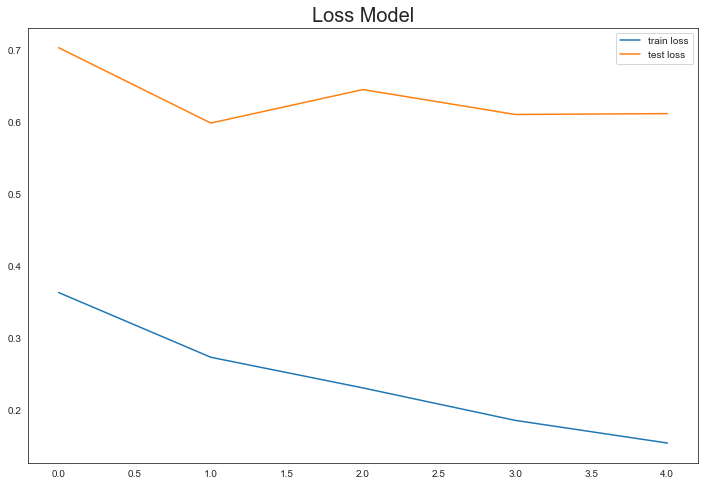

In [96]:
plt.figure(figsize=(12,8))
plt.title('Loss Model', fontsize=20)
plt.plot(history_3.history['loss'],label='train loss')
plt.plot(history_3.history['val_loss'],label='test loss')
plt.legend()

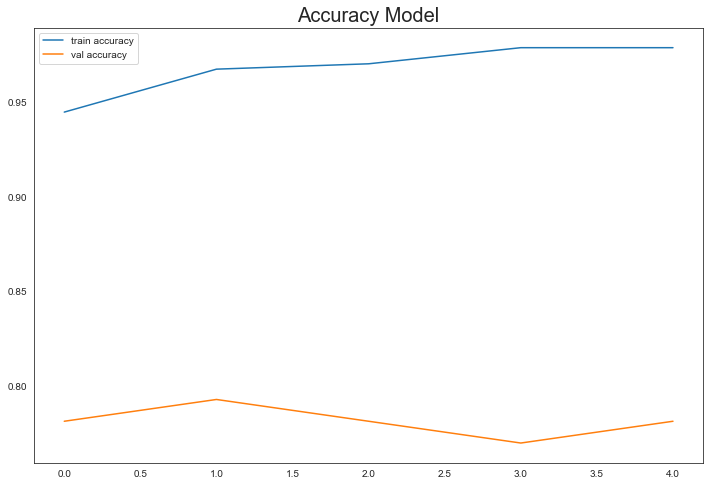

In [97]:
plt.figure(figsize=(12,8))
plt.title('Accuracy Model', fontsize=20)
plt.plot(history_3.history['accuracy'],label='train accuracy')
plt.plot(history_3.history['val_accuracy'],label='val accuracy')
plt.legend()

## 5.3 Model Evaluation

In [99]:
# Evaluating result of the final model
result_eval= model_seq_1.evaluate(train_ds)
print('Train - Loss     : ', result_eval[0])
print('Train - Accuracy : ', result_eval[1])
print('')

result_eval= model_seq_1.evaluate(val_ds)
print('val - Loss     : ', result_eval[0])
print('val - Accuracy : ', result_eval[1])
print('')

result_eval= model_seq_1.evaluate(test_ds)
print('Test - Loss     : ', result_eval[0])
print('Test - Accuracy : ', result_eval[1])
print('')

23/23 [==============================] - 3s 119ms/step - loss: 0.6710 - accuracy: 0.7125
Train - Loss     :  0.6710017919540405
Train - Accuracy :  0.7124645709991455

3/3 [==============================] - 0s 110ms/step - loss: 1.5175 - accuracy: 0.4713
val - Loss     :  1.517543911933899
val - Accuracy :  0.4712643623352051

3/3 [==============================] - 0s 130ms/step - loss: 1.6385 - accuracy: 0.4565
Test - Loss     :  1.6384798288345337
Test - Accuracy :  0.45652174949645996



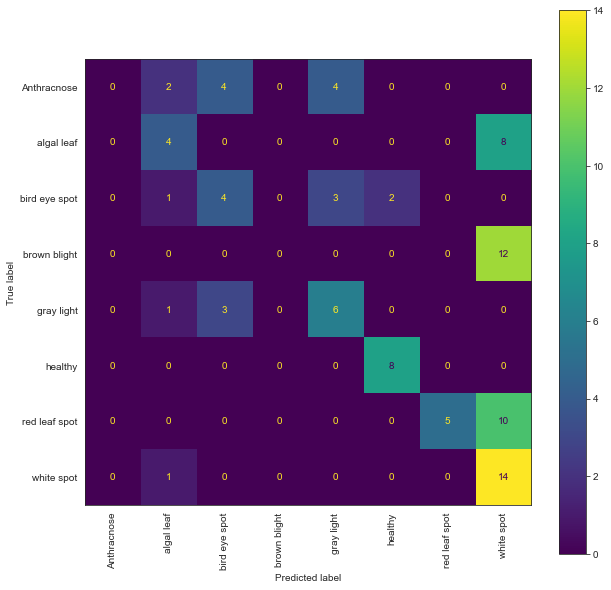

In [100]:
# confution Matrix
fig,ax = plt.subplots(figsize=[10,10])
ConfusionMatrixDisplay.from_predictions(true,pred, display_labels=class_names, xticks_rotation='vertical',ax=ax)
plt.show()

# Model Saving

In [101]:
model_seq_1.save('Disease_in_Tea_leaves.h5')

Base Model dipilih sebagai model terbaik dibandingkan dengan model baseline berdasarkan perbandingan skor loss dan skor accuracy terbaik saat model melakukan testing pada test dataset. 
> Model Baseline terhadap test dataset :
- Skor Loss : 0.67
- Skor Accuracy :  0.71

Dengan demikian Base Model dianggap lebih baik karena skor accuracy mencapai 0.71 dan loss hanya 0.67 dianggap sangat rencah karena skor tersebut mendekati skor 0 

# Model Inference

In [102]:
# Load model
model = tf.keras.models.load_model('Disease_in_Tea_leaves.h5')

3/3 [==============================] - 1s 128ms/step


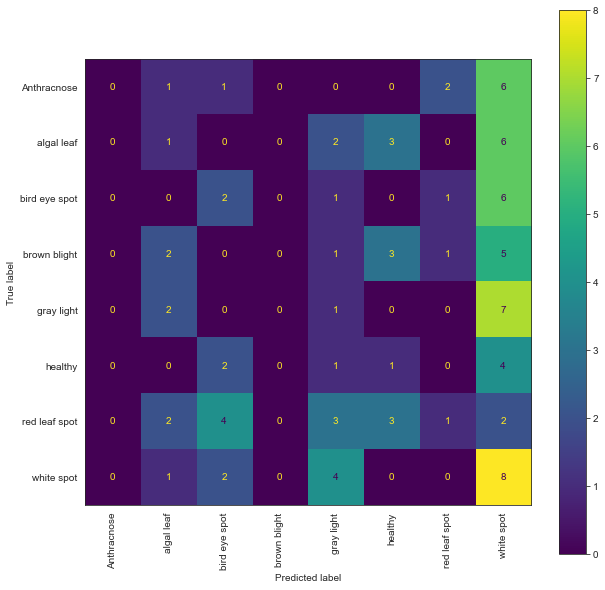

Classification Report
               precision    recall  f1-score   support

  Anthracnose       0.00      0.00      0.00        10
   algal leaf       0.11      0.08      0.10        12
bird eye spot       0.18      0.20      0.19        10
 brown blight       0.00      0.00      0.00        12
   gray light       0.08      0.10      0.09        10
      healthy       0.10      0.12      0.11         8
red leaf spot       0.20      0.07      0.10        15
   white spot       0.18      0.53      0.27        15

     accuracy                           0.15        92
    macro avg       0.11      0.14      0.11        92
 weighted avg       0.11      0.15      0.11        92



c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
pred = model.predict(test_dataset)
pred = np.argmax(pred, axis=1)
true = tf.concat([y for x, y in test_dataset], axis = 0).numpy()
true = np.argmax(true,axis=1)

# confusion Matrix
fig,ax = plt.subplots(figsize=[10,10])
ConfusionMatrixDisplay.from_predictions(true,pred, display_labels=class_names, xticks_rotation='vertical',ax=ax)
plt.show()
# classification report
print('Classification Report')
print(classification_report(true, pred, target_names=class_names))

# Model New Data

In [104]:
test_img = r"C:\Users\LENOVO\Desktop\P2ML2\p2---ftds-002-hck---m2-Ajengnilta\Dataset Tea Sickness\test\healthy\UNADJUSTEDNONRAW_thumb_209.jpg"

img = keras.preprocessing.image.load_img(
    test_img, target_size=(IMG_HEIGHT, IMG_WIDTH))

In [105]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 113ms/step
This image most likely belongs to bird eye spot with a 15.38 percent confidence.


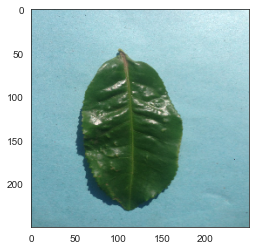

In [106]:
plt.imshow(img)
plt.show()

Hasil dari pengujian dengan new data menynjukan bahwa foto wajah tersebut masuk ke dalam kategori beautiful dengan persensate sebesar 15%

# Conclusion

Datasets are splitted into 3 folders as follows:

```
train dataset (80%): 706 images belonging to 8 classes
valid dataset (10%): 87 images belonging to 8 classes
test dataset (10%): 92 images belonging to 8 classes
```